In [1]:
from astroquery.gaia import Gaia
from astroquery.esasky import ESASky
import numpy as np
from simbad_download import resolve_name
import pandas as pd
import pyvo as vo
import gaia_download as gd
from cross_match import add_panstarrs1, add_twomass
import matplotlib.pyplot as plt
from extinction import add_color, mag_abs

Configuration file not found:

    /home/mjablons/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


1. arcesonds

In [2]:
sources = pd.read_csv('./clustered_pyupmask.csv')

In [3]:
sources

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_i,A_z,A_y,A_J,A_H,A_K,color,color_error,mag_abs,mag_abs_error
0,28257,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,...,0.916515,0.720285,0.587295,0.368605,0.218085,0.140709,1.603039,0.170145,8.676971,2.127860
1,28274,1636148068921376768,Gaia DR3 573352398572667392,573352398572667392,1496645516,2016.0,12.993639,0.105877,84.541275,0.101403,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.313450,0.029984,6.871222,0.464217
2,28314,1636148068921376768,Gaia DR3 573354670612121088,573354670612121088,1494711348,2016.0,12.852203,0.035797,84.583456,0.034287,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,0.828158,0.006719,5.087451,0.154759
3,28351,1636148068921376768,Gaia DR3 573356251160187648,573356251160187648,1580589992,2016.0,14.600912,0.043472,84.598119,0.042857,...,0.855414,0.672266,0.548142,0.344032,0.203546,0.131328,0.925355,0.008670,5.193372,0.196794
4,28407,1636148068921376768,Gaia DR3 573358072225488640,573358072225488640,1042182307,2016.0,15.209703,0.548097,84.651333,0.534833,...,1.038717,0.816323,0.665601,0.417753,0.247163,0.159470,1.646164,0.219736,8.520184,2.735473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,46811,1636148068921376768,Gaia DR3 574074438411227008,574074438411227008,1625845342,2016.0,12.816654,0.023106,85.832411,0.022673,...,1.160919,0.912361,0.743907,0.466900,0.276241,0.178231,0.810865,0.002632,3.522337,0.120212
1354,46870,1636148068921376768,Gaia DR3 574077148534800256,574077148534800256,693263320,2016.0,15.660463,0.065472,85.827157,0.066398,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.058915,0.022668,5.933452,0.335183
1355,46886,1636148068921376768,Gaia DR3 574077492132196736,574077492132196736,406142901,2016.0,15.041704,0.306579,85.866458,0.294523,...,0.794313,0.624247,0.508989,0.319458,0.189007,0.121948,1.427450,0.100781,8.432726,1.258062
1356,47085,1636148068921376768,Gaia DR3 574086670477932160,574086670477932160,1450102305,2016.0,11.476798,0.234107,85.885935,0.246116,...,0.672111,0.528209,0.430683,0.270311,0.159929,0.103187,1.595926,0.083275,8.028013,1.050452


In [4]:
sources_with_panstarrs = add_panstarrs1(sources)

INFO: Query finished. [astroquery.utils.tap.core]
panstarrs1 cross-match: 1275 sources


In [5]:
sources_with_panstarrs = add_color(sources_with_panstarrs, 'r', 'i')
sources_with_panstarrs = mag_abs(sources_with_panstarrs, 'g')

In [9]:
sources_with_panstarrs = sources_with_panstarrs[np.abs(sources_with_panstarrs['g-r'])<10]
sources_with_panstarrs = sources_with_panstarrs[np.abs(sources_with_panstarrs['g_abs'])<30]

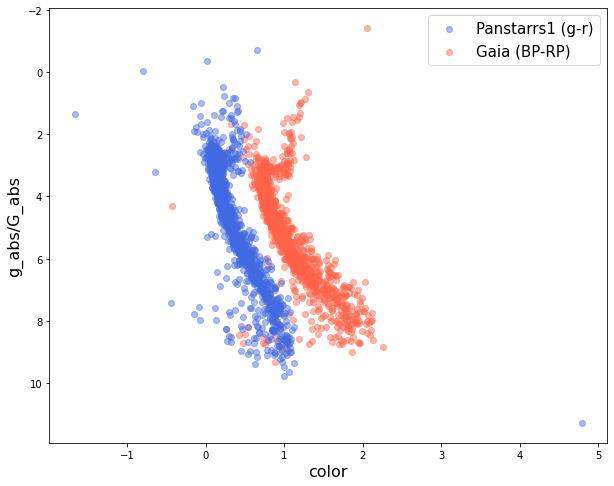

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(sources_with_panstarrs['g-r'], sources_with_panstarrs.g_abs,
            color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_with_panstarrs.color, sources_with_panstarrs.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.gca().set_ylabel('g_abs/G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);

In [59]:
sources_all = add_twomass(sources_with_panstarrs)

INFO: Query finished. [astroquery.utils.tap.core]
tmass_psc_xsc cross-match: 1092 sources


In [50]:
sources_all = add_color(sources_all, 'g', 'z')

In [36]:
sources_all = mag_abs(sources_all, 'H')

In [37]:
%matplotlib notebook  

<IPython.core.display.Javascript object>


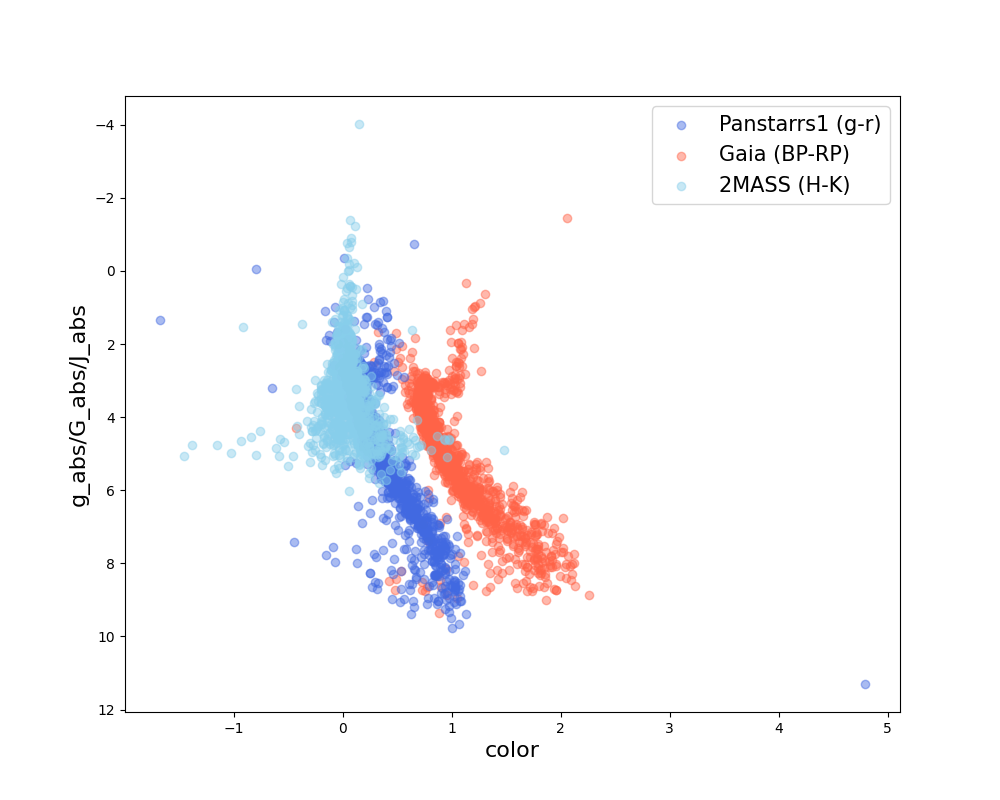

In [53]:
plt.figure(figsize=(10, 8))
plt.scatter(sources_all['g-r'], sources_all.g_abs,
            color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all['H-K'], sources_all.J_abs,
            color='skyblue', label='2MASS (H-K)', alpha=.45, zorder=2)
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.gca().set_ylabel('g_abs/G_abs/J_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);

<IPython.core.display.Javascript object>


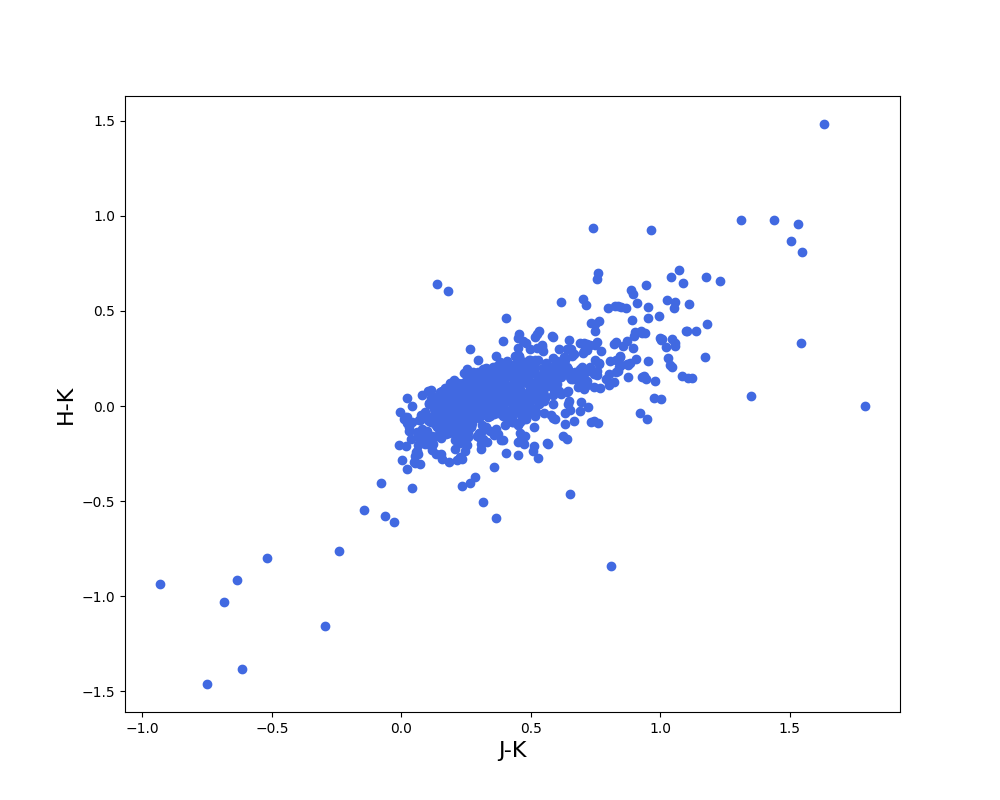

In [55]:
plt.figure(figsize=(10, 8));
plt.scatter(sources_all['J-K'], sources_all['H-K'], color='royalblue');
plt.gca().set_xlabel('J-K', fontsize=16);
plt.gca().set_ylabel('H-K', fontsize=16);

In [39]:
sources_all.head()

,H,H_error,J,J_error,K,K_error,source_id,twomass_id,g,g_error,...,g_abs,g_abs_error,H-K,H-K_error,H_abs,H_abs_error,J-K,J-K_error,J_abs,J_abs_error
0,NaN,NaN,NaN,NaN,NaN,NaN,573351475155035008,NaN,21.689501,0.236076,...,8.630933,2.140908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.186001,0.237,16.705,0.143,15.810,0.267,573352398572667392,00515823+8432287,19.279100,0.006316,...,6.724392,0.464257,0.319258,0.357013,4.671001,0.521214,0.727875,0.302883,5.079619,0.485740
2,14.937000,0.092,15.341,0.056,14.821,0.112,573354670612121088,00512445+8435004,17.080999,0.004002,...,4.652707,0.154809,0.059258,0.144941,3.548417,0.180039,0.352875,0.125220,3.842034,0.164578
3,15.102000,0.082,15.472,0.039,15.052,0.123,573356251160187648,00582412+8435530,17.479900,0.008991,...,4.602746,0.196998,-0.022217,0.147828,3.548112,0.213193,0.207297,0.129035,3.777626,0.200620
4,14.896000,0.082,15.399,0.046,14.780,0.096,573360099450875776,00570724+8446523,17.290001,0.005483,...,4.183313,0.213743,0.043783,0.126254,3.112578,0.228867,0.406297,0.106452,3.475092,0.218568


In [57]:
from sklearn.ensemble import IsolationForest

In [94]:
color_mag_abs = sources_all[['color', 'mag_abs']]

In [95]:
clf = IsolationForest(contamination=0.25).fit_predict(color_mag_abs.values)

In [96]:
sources_all['outlier'] = clf

<IPython.core.display.Javascript object>


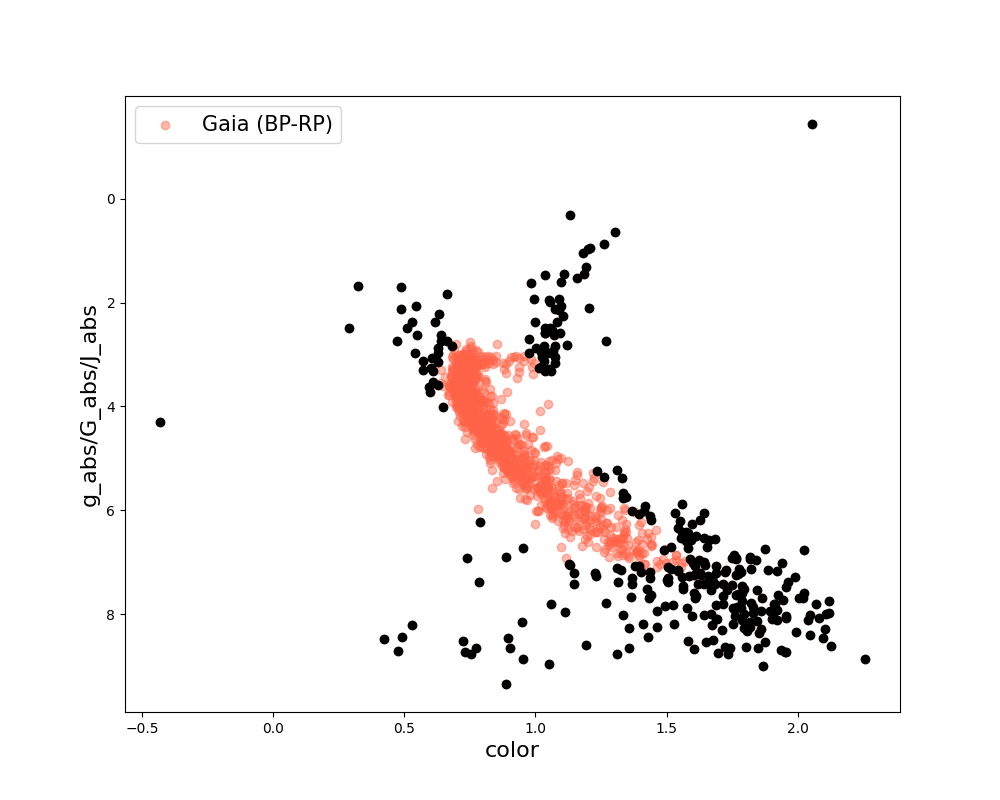

In [111]:
plt.figure(figsize=(10, 8))
# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
            color='black')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);
plt.gca().set_ylabel('g_abs/G_abs/J_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);

In [139]:
isochrone = np.loadtxt('./cmd_test.dat', usecols=(28, 29, 30))

In [140]:
isochrone.shape

(297, 3)

In [141]:
isochrone = isochrone[isochrone[:, 1]<25]

<IPython.core.display.Javascript object>


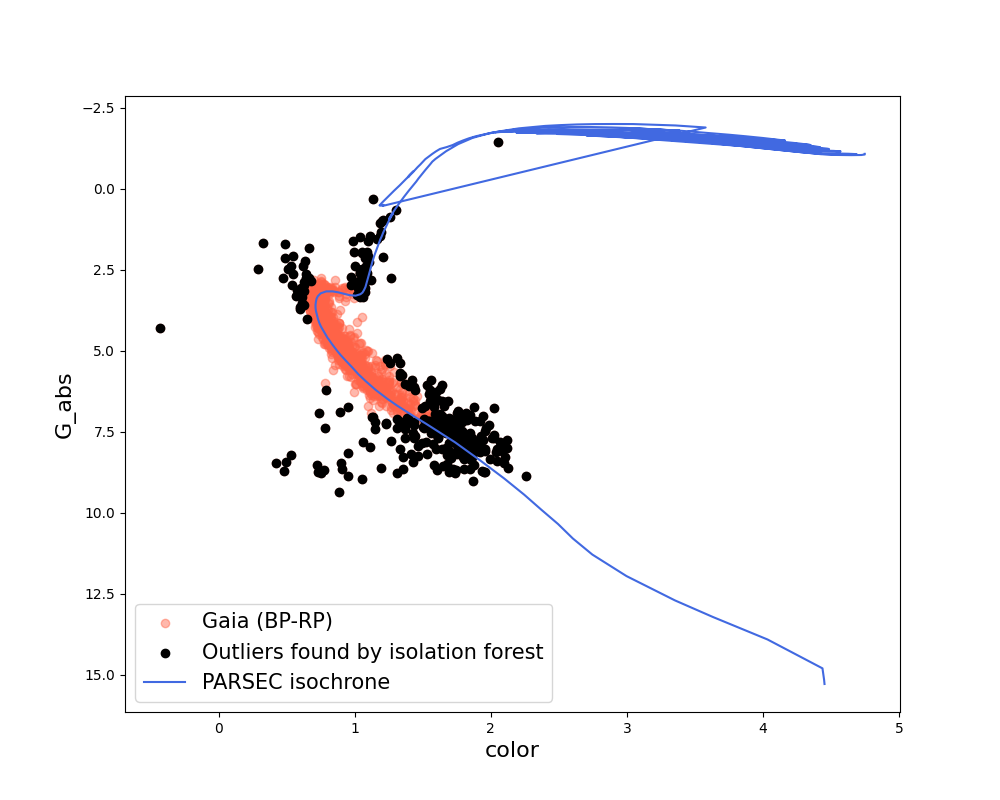

In [155]:
plt.figure(figsize=(10, 8))
# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
            color='black', label='Outliers found by isolation forest')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone[:, 1]-isochrone[:, 2], isochrone[:, 0], label='PARSEC isochrone', color='royalblue')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

Constrain the isochrone to the part that interests me

<IPython.core.display.Javascript object>


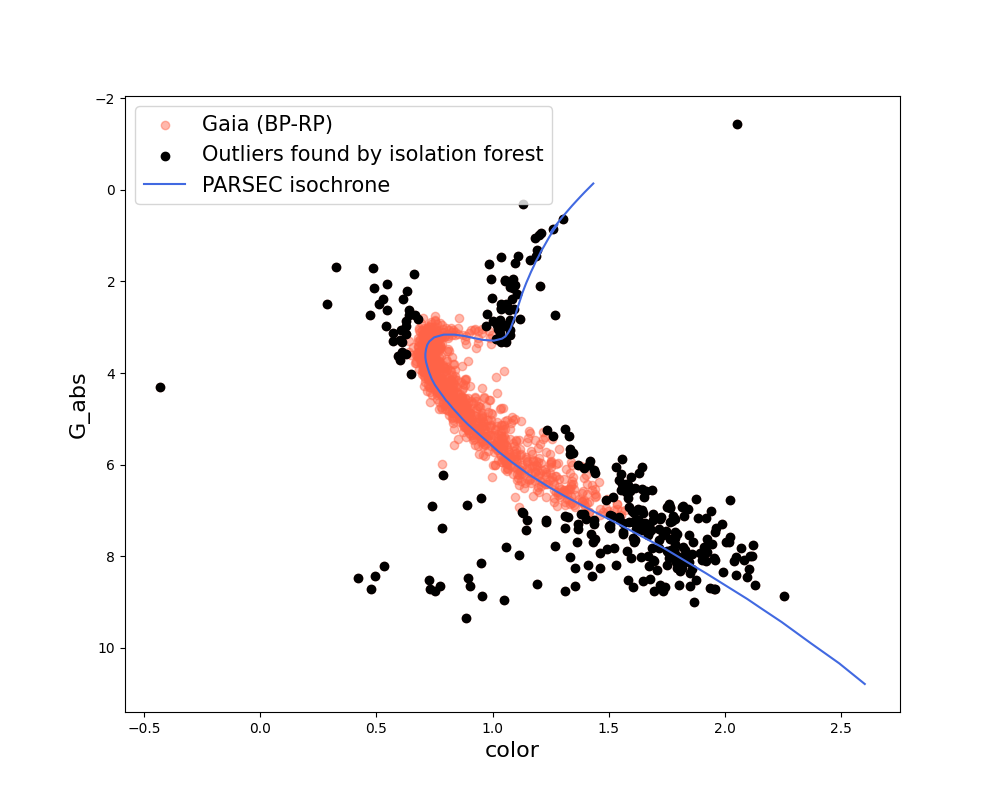

In [382]:
plt.figure(figsize=(10, 8))

isochrone_start_ind = 10
isochrone_end_ind = 100

# plt.scatter(sources_all['g-r'], sources_all.g_abs,
#             color='royalblue', label='Panstarrs1 (g-r)', alpha=.45, zorder=2)
plt.scatter(sources_all.color, sources_all.mag_abs,
            color='tomato', label='Gaia (BP-RP)', alpha=.45)
plt.scatter(sources_all[sources_all.outlier==-1].color, sources_all[sources_all.outlier==-1].mag_abs,
            color='black', label='Outliers found by isolation forest')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone[isochrone_start_ind:isochrone_end_ind, 1]-isochrone[isochrone_start_ind:isochrone_end_ind, 2],
         isochrone[isochrone_start_ind:isochrone_end_ind, 0], label='PARSEC isochrone', color='royalblue')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [463]:
isochrone_cut = isochrone[isochrone_start_ind:isochrone_end_ind]
isochrone_cut = np.concatenate([
    (isochrone_cut[:, 1]-isochrone_cut[:, 2]).reshape(-1, 1),
    isochrone_cut[:, 0].reshape(-1, 1)], axis=1)

In [464]:
from scipy.interpolate import interp1d

In [476]:
BOUNDS = np.max(isochrone_cut, axis=0)-np.min(isochrone_cut, axis=0)

In [509]:
BOUNDS

array([ 1.892, 10.926])

In [540]:
def closest(source, isochrone):
    two_closest = isochrone[
    np.argsort(
            np.linalg.norm((source-isochrone), axis=1).flatten()
        )
    ][:2]
    return two_closest[0], two_closest[1]

def distance_to_closest(source, isochrone):
    src_rescaled = source/BOUNDS
    isochrone_rescaled = isochrone/BOUNDS
    p1, p2 = closest(src_rescaled, isochrone_rescaled)
    return np.linalg.norm(np.cross((p2-p1), (p1-src_rescaled)))/np.linalg.norm((p2-p1))

In [541]:
closest(np.array([0.7, 3.5]), isochrone_cut)

(array([0.714, 3.474]), array([0.711, 3.572]))

In [542]:
distance_to_closest(np.array([0.7, 3.5]), isochrone_cut)

0.006872342218776322

In [543]:
sources_all[['color', 'mag_abs']].values.shape

(1247, 2)

In [544]:
dists = np.apply_along_axis(lambda x: distance_to_closest(x, isochrone_cut), 1, sources_all[['color', 'mag_abs']].values)

<IPython.core.display.Javascript object>


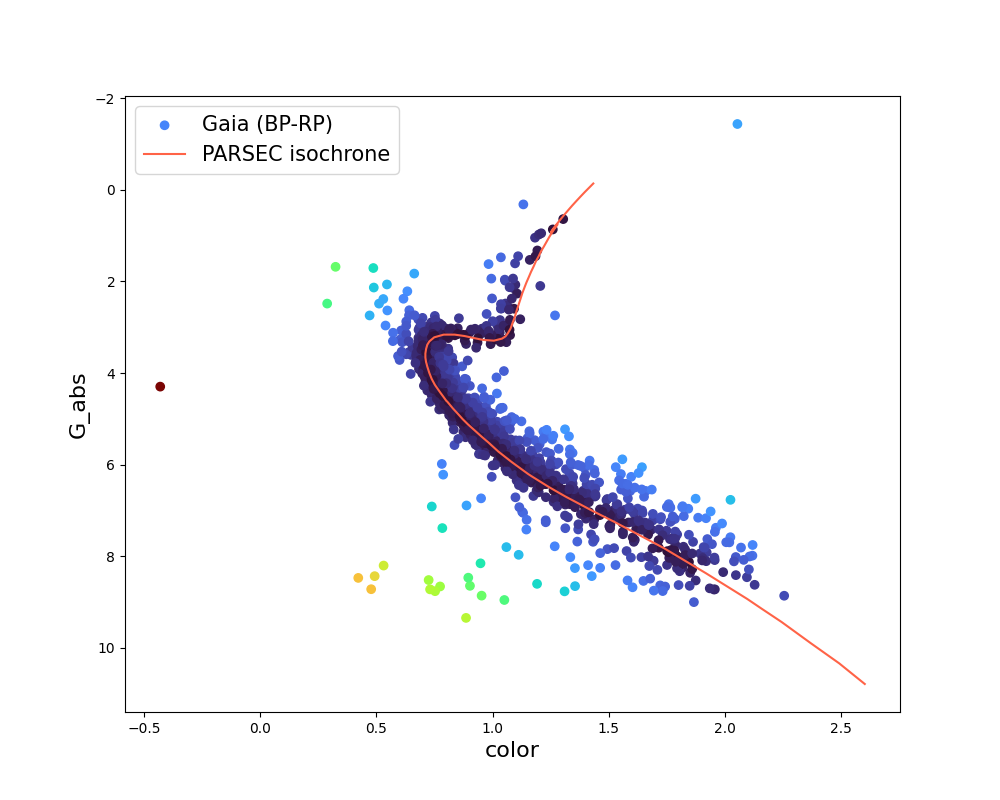

In [545]:
fig = plt.figure(figsize=(10, 8));
plt.scatter(sources_all.color, sources_all.mag_abs,
            c=dists, cmap='turbo', label='Gaia (BP-RP)')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1], label='PARSEC isochrone', color='tomato')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [546]:
np.std(dists)

0.04546761547662515

<IPython.core.display.Javascript object>


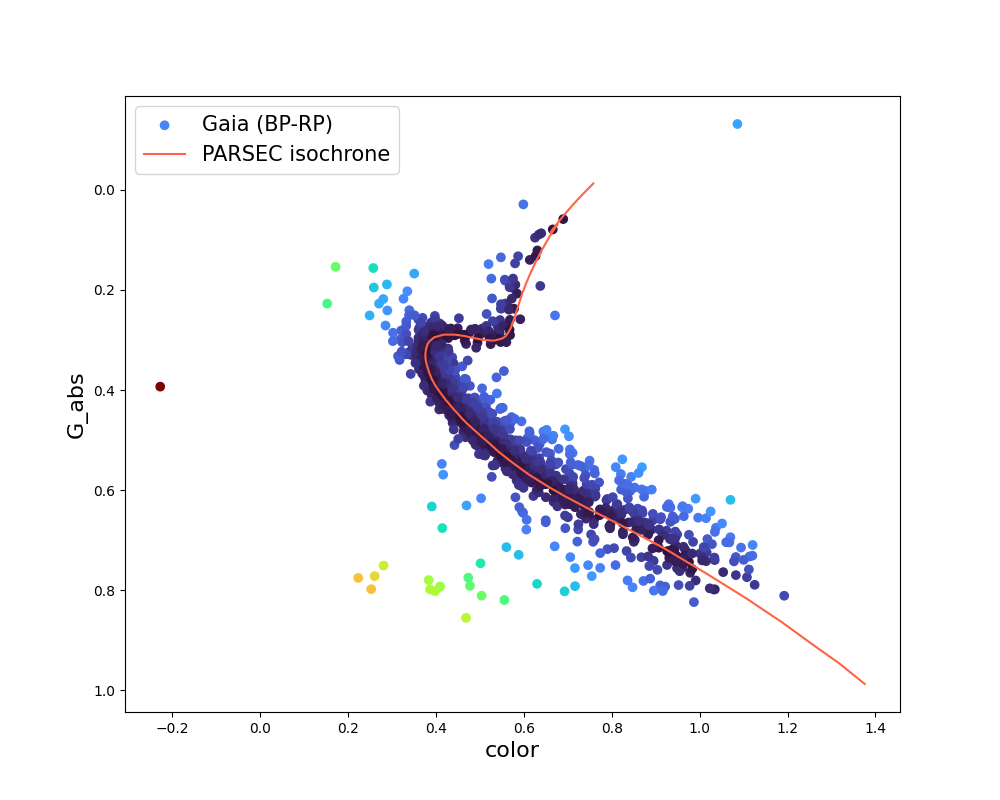

In [547]:
plt.figure(figsize=(10, 8));
plt.scatter(sources_all.color/BOUNDS[0], sources_all.mag_abs/BOUNDS[1],
            c=dists, cmap='turbo', label='Gaia (BP-RP)')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0]/BOUNDS[0], isochrone_cut[:, 1]/BOUNDS[1], label='PARSEC isochrone', color='tomato')
# outliers = sources_all[dists>np.std(dists)]
# plt.scatter(outliers.color, outliers.mag_abs, color='tomato')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

<IPython.core.display.Javascript object>


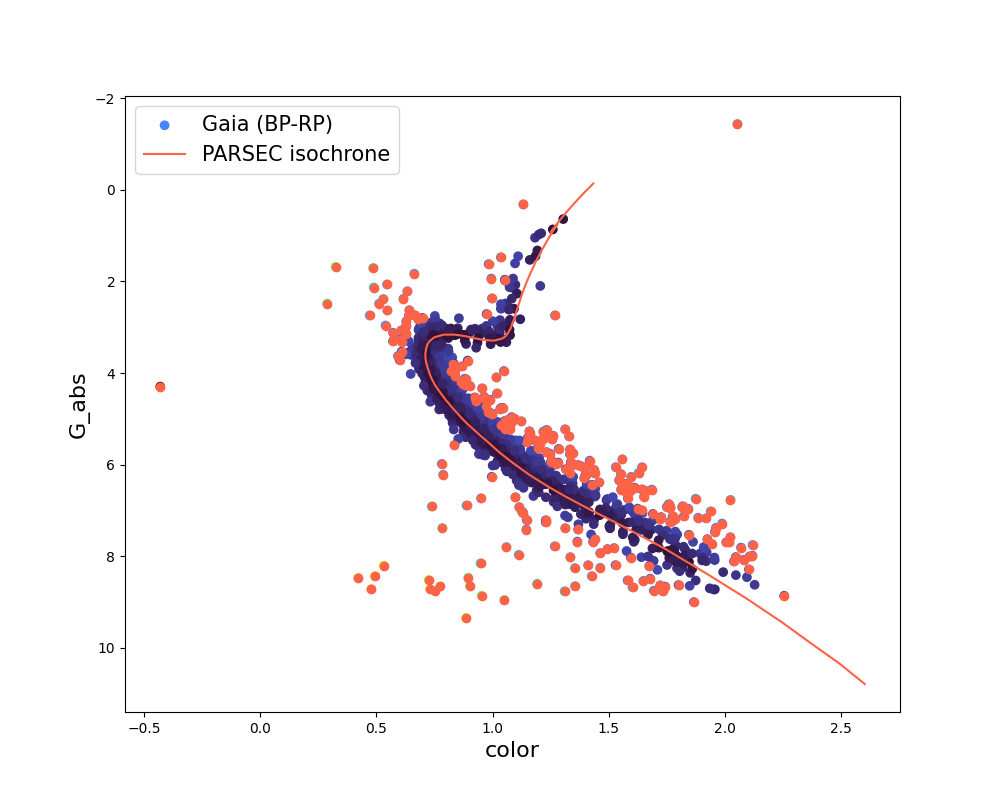

In [548]:
plt.figure(figsize=(10, 8));
plt.scatter(sources_all.color, sources_all.mag_abs,
            c=dists, cmap='turbo', label='Gaia (BP-RP)')
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_xlabel('color', fontsize=16);
plt.plot(isochrone_cut[:, 0], isochrone_cut[:, 1], label='PARSEC isochrone', color='tomato')
outliers = sources_all[dists>np.std(dists)]
plt.scatter(outliers.color, outliers.mag_abs, color='tomato')
plt.gca().invert_yaxis();
plt.legend(fontsize=15);

In [473]:
closest(np.array([0.85, 2.7]), isochrone_cut)

(array([1.1  , 2.708]), array([1.104, 2.637]))